<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/examples/multi_modal/openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using OpenAI GPT-4V model for image reasoning

In this notebook, we show how to use OpenAI GPT4V MultiModal LLM class/abstraction for image understanding/reasoning.

We also show several functions we are now supporting for OpenAI GPT4V LLM:
* `complete` (both sync and async): for a single prompt and list of images
* `chat` (both sync and async): for multiple chat messages
* `stream complete` (both sync and async): for steaming output of complete
* `stream chat` (both sync and async): for steaming output of chat

In [ ]:
!pip install openai matplotlib

##  Use GPT4V to understand Images from URLs

In [ ]:
import os

OPENAI_API_TOKEN = "sk-"  # Your OpenAI API token here
os.environ["OPENAI_API_TOKEN"] = OPENAI_API_TOKEN

## Initialize `OpenAIMultiModal` and Load Images from URLs

## 

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)


image_urls = [
    # "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    # "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents = load_image_urls(image_urls)

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=300
)

https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg


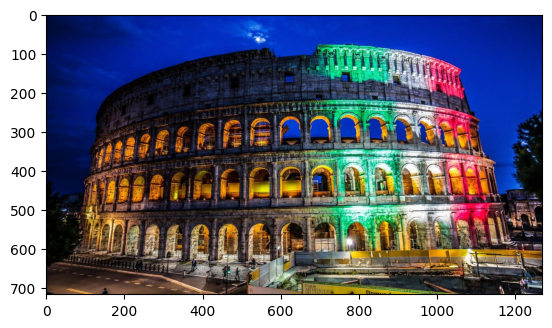

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

The image shows the Colosseum in Rome illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's multiple arches are vividly lit, contrasting with the dark blue sky in the background. Some construction or restoration work appears to be in progress at the base of the structure, and a few people can be seen walking near the site.


### Steam Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = openai_mm_llm.stream_complete(
    prompt="give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.delta, end="")

This image shows the Colosseum, also known as the Flavian Amphitheatre, which is an iconic symbol of Imperial Rome and is located in the center of Rome, Italy. It is one of the world's most famous landmarks and is considered one of the greatest works of Roman architecture and engineering.

The Colosseum is illuminated at night with the colors of the Italian flag: green, white, and red. This lighting could be for a special occasion or event, such as a national holiday, a cultural celebration, or in solidarity with a cause. The use of lighting to display the national colors is a way to highlight the structure's significance to Italy and its people.

The Colosseum was built in the first century AD under the emperors of the Flavian dynasty and was used for gladiatorial contests and public spectacles such as mock sea battles, animal hunts, executions, re-enactments of famous battles, and dramas based on Classical mythology. It could hold between 50,000 and 80,000 spectators and was used for

### Chat through a list of chat messages

In [ ]:
from llama_index.multi_modal_llms.openai_utils import (
    generate_openai_multi_modal_chat_message,
)

chat_msg_1 = generate_openai_multi_modal_chat_message(
    prompt="Describe the images as an alternative text",
    role="user",
    image_documents=image_documents,
)

chat_msg_2 = generate_openai_multi_modal_chat_message(
    prompt="The image is a graph showing the surge in US mortgage rates. It is a visual representation of data, with a title at the top and labels for the x and y-axes. Unfortunately, without seeing the image, I cannot provide specific details about the data or the exact design of the graph.",
    role="assistant",
)

chat_msg_3 = generate_openai_multi_modal_chat_message(
    prompt="can I know more?",
    role="user",
)

chat_messages = [chat_msg_1, chat_msg_2, chat_msg_3]
chat_response = openai_mm_llm.chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for msg in chat_messages:
    print(msg.role, msg.content)

MessageRole.USER [{'type': 'text', 'text': 'Describe the images as an alternative text'}, {'type': 'image_url', 'image_url': 'https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg'}]
MessageRole.ASSISTANT The image is a graph showing the surge in US mortgage rates. It is a visual representation of data, with a title at the top and labels for the x and y-axes. Unfortunately, without seeing the image, I cannot provide specific details about the data or the exact design of the graph.
MessageRole.USER can I know more?


In [ ]:
print(chat_response)

assistant: I apologize for the confusion earlier. The image actually shows the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater is captured in a twilight setting, with the sky transitioning from blue to black. The lighting accentuates the arches and the texture of the stone, creating a dramatic and colorful display. There are some people and a street visible in the foreground, with construction barriers indicating some ongoing work or preservation efforts.


### Stream Chat through a list of chat messages

In [ ]:
stream_chat_response = openai_mm_llm.stream_chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for r in stream_chat_response:
    print(r.delta, end="")

I apologize for the confusion earlier. The image actually shows the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater is captured in a twilight setting, with the sky transitioning from blue to black. The lighting accentuates the arches and the texture of the stone, creating a dramatic and patriotic display. There are a few people visible at the base of the Colosseum, and some construction barriers suggest maintenance or archaeological work may be taking place.

### Async Complete

In [ ]:
response_acomplete = await openai_mm_llm.acomplete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(response_acomplete)

The image shows the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's iconic arches are vividly lit, and the structure stands out against the dark blue evening sky. A few people can be seen near the base of the Colosseum, and there is some construction fencing visible in the foreground.


### Async Steam Complete

In [ ]:
response_astream_complete = await openai_mm_llm.astream_complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
async for delta in response_astream_complete:
    print(delta.delta, end="")

The image shows the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's iconic arches are vividly lit, and the structure stands out against the dark blue evening sky. Some construction or restoration work appears to be in progress at the base of the Colosseum, indicated by scaffolding and barriers. A few individuals can be seen near the structure, giving a sense of scale to the massive edifice.

### Async Chat

In [ ]:
achat_response = await openai_mm_llm.achat(
    messages=chat_messages,
)

In [ ]:
print(achat_response)

assistant: I apologize for the confusion in my previous response. Let me provide you with an accurate description of the image you've provided.

The image shows the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater is captured in a moment of twilight, with the sky transitioning from blue to black, highlighting the structure's iconic arches and the illuminated colors. There are some people and a street visible in the foreground, with construction barriers indicating some ongoing work or preservation efforts. The Colosseum's grandeur and historical significance are emphasized by the lighting and the dusk setting.


### Async stream Chat

In [ ]:
astream_chat_response = await openai_mm_llm.astream_chat(
    messages=chat_messages,
)

In [ ]:
async for delta in astream_chat_response:
    print(delta.delta, end="")

I apologize for the confusion in my previous response. The image actually depicts the Colosseum in Rome, Italy, illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater is shown with its iconic arched openings, and the lighting accentuates its grandeur against the evening sky. There are a few people and some construction barriers visible at the base, indicating ongoing preservation efforts or public works.

## Complete with Two images

In [ ]:
image_urls = [
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    # "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents_1 = load_image_urls(image_urls)

response_multi = openai_mm_llm.complete(
    prompt="is there any relationship between those images?",
    image_documents=image_documents_1,
)
print(response_multi)

No, there is no direct relationship between these two images. The first image is an infographic showing the surge in U.S. mortgage rates and its comparison with existing home sales, indicating economic data. The second image is of a person holding a trophy, which seems to be related to a sports achievement or recognition. The content of the two images pertains to entirely different subjects—one is focused on economic information, while the other is related to an individual's achievement in a likely sporting context.


##  Use GPT4V to understand images from local files

In [ ]:
from llama_index import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./images_wiki").load_data()

response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

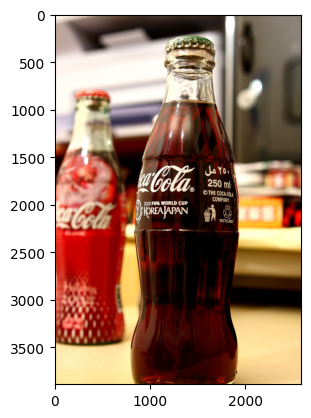

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./images_wiki/3.jpg")
plt.imshow(img)

In [ ]:
print(response)

You are looking at a close-up image of a glass Coca-Cola bottle. The label on the bottle features the iconic Coca-Cola logo with additional text underneath it commemorating the 2002 FIFA World Cup hosted by Korea/Japan. The label also indicates that the bottle contains 250 ml of the product. In the background with a shallow depth of field, you can see the blurred image of another Coca-Cola bottle, emphasizing the focus on the one in the foreground. The overall lighting and detail provide a clear view of the bottle and its labeling.
